In [73]:
# 도로명 주소를 가지고 위도 경로로 변경하는 라이브러리
!pip install geopy
from geopy.geocoders import Nominatim
def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)} # 위도 경도
    print('-',end="")
    return crd
geocoding('서울특별시 강동구 상일로 31')

-

{'lat': '37.553051', 'lng': '127.1723493'}

In [52]:
from geopy.geocoders import Nominatim
def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)} # 위도 경도

    return crd
geocoding('강원도 춘천시')

{'lat': '37.8810569', 'lng': '127.7297641'}

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm
font_loc = 'C:/Windows/Fonts/H2PORM.TTF'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 한글폰트적용시 - 깨짐방지..

In [3]:
# Goal : 행정구역별 공공보건의료기관 수 / 행정구역별 인구수대비 공공보건의료기관 비율


In [4]:
df = pd.read_csv('보건복지부_공공보건 의료기관 현황_20161231.csv',encoding='cp949')
df.head()

,연번,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
0,1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
1,2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
2,3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
3,4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
4,5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [5]:
# 1. 행정구역 이름으로 주소 수정
# 2. 행정구역별 공공보건의료기관 수 집계
# 3. 행정구역별 인구수 테이터 정리
# 4. 테이블에 필요한 컬럼 추출 후 테이블 병합
# 블록맵 - 튜플형태의 x y 좌료로 변환
# 행정구역별 데이터 크기를 시각화할때 

In [6]:
# 주소컬럼에서 시도,군구 정보를 분리
newAddr = pd.DataFrame( df['주소'].apply(lambda x : x.split()[:2]).tolist(), columns=('시도','군구'))
newAddr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [7]:
newAddr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [8]:
# '창원시' '경산시'  '천안시'
newAddr[newAddr['시도'].isin(['창원시', '경산시',  '천안시'])]
newAddr[newAddr['시도'].isin(['창원시'])]
# newAddr.iloc[27] = ['경상남도','창원시']
# newAddr.iloc[31] = ['경상남도','창원시']
newAddr[newAddr['시도'].isin(['경산시'])]
# newAddr.iloc[47] = ['경상북도','경산시']
newAddr[newAddr['시도'].isin(['천안시'])]
# newAddr.iloc[209] = ['충청남도','천안시']
# newAddr.iloc[210] = ['충청남도','천안시']


,시도,군구
209,천안시,동남구
210,천안시,동남구


In [9]:
newAddr.iloc[27] = ['경상남도','창원시']
newAddr.iloc[31] = ['경상남도','창원시']
newAddr.iloc[47] = ['경상북도','경산시']
newAddr.iloc[209] = ['충청남도','천안시']
newAddr.iloc[210] = ['충청남도','천안시']

In [10]:
original = newAddr['시도'].unique()
a = '경기 경남 경북 충북 서울시 부산특별시 대전시 충남 전남 전북'.split()
b = '경기도 경상남도 경상북도 충청북도 서울특별시 부산광역시 대전광역시 충청남도 전라남도 전라북도'.split()
add_dict = dict(zip(a,b))
add_dict

{'경기': '경기도',
 '경남': '경상남도',
 '경북': '경상북도',
 '충북': '충청북도',
 '서울시': '서울특별시',
 '부산특별시': '부산광역시',
 '대전시': '대전광역시',
 '충남': '충청남도',
 '전남': '전라남도',
 '전북': '전라북도'}

In [11]:
'경기'  in add_dict
add_dict['경기']
newAddr['시도'] = newAddr['시도'].apply(lambda x :  add_dict.get(x,x) )
newAddr['시도'] = [add_dict[i] if i in add_dict else i for i in newAddr['시도']]

In [12]:
newAddr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [13]:
newAddr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [14]:
newAddr[newAddr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [15]:
newAddr.loc[75,'군구'] = '제주시'

In [16]:
df = pd.concat([df,newAddr],axis=1)
df.head()

,연번,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고,시도,군구
0,1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN,강원도,춘천시
1,2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN,강원도,삼척시
2,3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN,강원도,영월군
3,4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN,강원도,원주시
4,5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN,강원도,강릉시


In [17]:
df['연번'].value_counts()
df[df['연번'] == 124]  # 124 125 126 127
df.drop(index=[124,125,126,127],inplace=True)

In [18]:
df[df['연번'] == 165] 
df.drop(index=[169,170,171],inplace=True)

In [19]:
df.reset_index(drop=True,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   연번          220 non-null    int64 
 1   병원 명        220 non-null    object
 2   설립형태        220 non-null    object
 3   근거 법령       220 non-null    object
 4   관계 행정기관     220 non-null    object
 5   관계 공공단체     220 non-null    object
 6   심평원 요양기관번호  220 non-null    int64 
 7   종별구분        220 non-null    object
 8   병상수         220 non-null    int64 
 9   소재지 우편번호    220 non-null    object
 10  주소          220 non-null    object
 11  홈페이지        220 non-null    object
 12  대표전화        220 non-null    object
 13  FAX         220 non-null    object
 14  비고          4 non-null      object
 15  시도          220 non-null    object
 16  군구          220 non-null    object
dtypes: int64(3), object(14)
memory usage: 29.3+ KB


In [21]:
df['연번'].value_counts().values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [22]:
# 시도 군구 합쳐서 시도군구 컬럼을 하나 생성해주세요
# 행정구역별 공공보건 의료기관의 수 구하고 시각화

In [23]:
df.head()

,연번,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고,시도,군구
0,1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN,강원도,춘천시
1,2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN,강원도,삼척시
2,3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN,강원도,영월군
3,4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN,강원도,원주시
4,5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN,강원도,강릉시


In [24]:
df['시도군구'] = df['시도'] + " " +  df['군구']

In [25]:
df['count'] = 0

In [26]:
df2 = df.copy()

In [27]:
df2['count'] = df.groupby(['시도군구'])['군구'].transform('count')

In [28]:
pd.options.display.max_rows = None
df3 = df2.loc[:,['시도','군구','시도군구','count']]
df3[df3['군구'] == '동매로']
df3.loc[151,'군구'] = '사하구'
df3.loc[151,'시도군구'] = '부산광역시 사하구'
df3.loc[151]

시도           부산광역시
군구             사하구
시도군구     부산광역시 사하구
count            1
Name: 151, dtype: object

In [29]:
# 행정구역별 인구수
temp = pd.read_excel('행정구역_시군구_별__성별_인구수.xlsx')
a = temp.loc[:,['2021', '2021.1', '2021.2']]
b = temp.loc[:,['행정구역(시군구)별','행정구역(시군구)별.1']]
temp = pd.concat([a,b],axis=1)
temp.columns = temp.iloc[0]
temp = temp.iloc[1:]
temp.columns = ['총인구수(명)','남자인구수(명)','여자인구수(명)','시도','군구']
temp['시도'] = temp['시도'].apply(lambda x : x.strip())
temp['군구'] = temp['군구'].apply(lambda x : x.strip())
temp['시도군구'] = temp['시도']+" "+temp['군구']
temp.head()
# 시도 군구 시도군구 총인구수 남자인구수 여자인구수  2021년도 기준

,총인구수(명),남자인구수(명),여자인구수(명),시도,군구,시도군구
1,51638809,25746684,25892125,전국,소계,전국 소계
2,9509458,4618040,4891418,서울특별시,소계,서울특별시 소계
3,144683,70183,74500,서울특별시,종로구,서울특별시 종로구
4,122499,59630,62869,서울특별시,중구,서울특별시 중구
5,222953,107210,115743,서울특별시,용산구,서울특별시 용산구


In [30]:
# 시도 군구 총인구수 남자인구수 여자인구수 
len(df3), len(temp)
(temp['시도군구'] =='경상남도 창원시').sum()

2

In [31]:
merged_df= pd.merge(left=df3,right=temp,how='left',on='시도군구')
merged_df.head(2)

,시도_x,군구_x,시도군구,count,총인구수(명),남자인구수(명),여자인구수(명),시도_y,군구_y
0,강원도,춘천시,강원도 춘천시,5,284594,140584,144010,강원도,춘천시
1,강원도,삼척시,강원도 삼척시,1,63429,32043,31386,강원도,삼척시


In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시도_x      227 non-null    object
 1   군구_x      227 non-null    object
 2   시도군구      227 non-null    object
 3   count     227 non-null    int64 
 4   총인구수(명)   227 non-null    object
 5   남자인구수(명)  227 non-null    object
 6   여자인구수(명)  227 non-null    object
 7   시도_y      227 non-null    object
 8   군구_y      227 non-null    object
dtypes: int64(1), object(8)
memory usage: 17.7+ KB


In [33]:
merged_df.head()

,시도_x,군구_x,시도군구,count,총인구수(명),남자인구수(명),여자인구수(명),시도_y,군구_y
0,강원도,춘천시,강원도 춘천시,5,284594,140584,144010,강원도,춘천시
1,강원도,삼척시,강원도 삼척시,1,63429,32043,31386,강원도,삼척시
2,강원도,영월군,강원도 영월군,1,37904,19626,18278,강원도,영월군
3,강원도,원주시,강원도 원주시,2,357757,177396,180361,강원도,원주시
4,강원도,강릉시,강원도 강릉시,4,212965,105667,107298,강원도,강릉시


In [34]:
merged_df = merged_df.iloc[:,:-2].rename(columns={'시도_x':'시도','군구_x':'군구'})
merged_df.head()

,시도,군구,시도군구,count,총인구수(명),남자인구수(명),여자인구수(명)
0,강원도,춘천시,강원도 춘천시,5,284594,140584,144010
1,강원도,삼척시,강원도 삼척시,1,63429,32043,31386
2,강원도,영월군,강원도 영월군,1,37904,19626,18278
3,강원도,원주시,강원도 원주시,2,357757,177396,180361
4,강원도,강릉시,강원도 강릉시,4,212965,105667,107298


In [35]:
remove_index = merged_df[merged_df['총인구수(명)'] == '-'].index
merged_df.drop(index=remove_index,inplace=True)

In [36]:
merged_df[merged_df.duplicated()]

,시도,군구,시도군구,count,총인구수(명),남자인구수(명),여자인구수(명)
6,강원도,춘천시,강원도 춘천시,5,284594,140584,144010
7,강원도,강릉시,강원도 강릉시,4,212965,105667,107298
21,경기도,용인시,경기도 용인시,4,1077508,534459,543049
26,경상남도,사천시,경상남도 사천시,2,109953,55433,54520
32,경상남도,창원시,경상남도 창원시,7,1032741,523223,509518
35,경상남도,창원시,경상남도 창원시,7,1032741,523223,509518
42,경상북도,포항시,경상북도 포항시,3,503852,255292,248560
44,경상북도,김천시,경상북도 김천시,2,140239,70305,69934
46,경상북도,안동시,경상북도 안동시,2,156972,77590,79382
56,경상북도,울진군,경상북도 울진군,2,47858,24026,23832


In [37]:
merged_df.drop_duplicates(inplace=True)

In [38]:
merged_df.duplicated().sum()

0

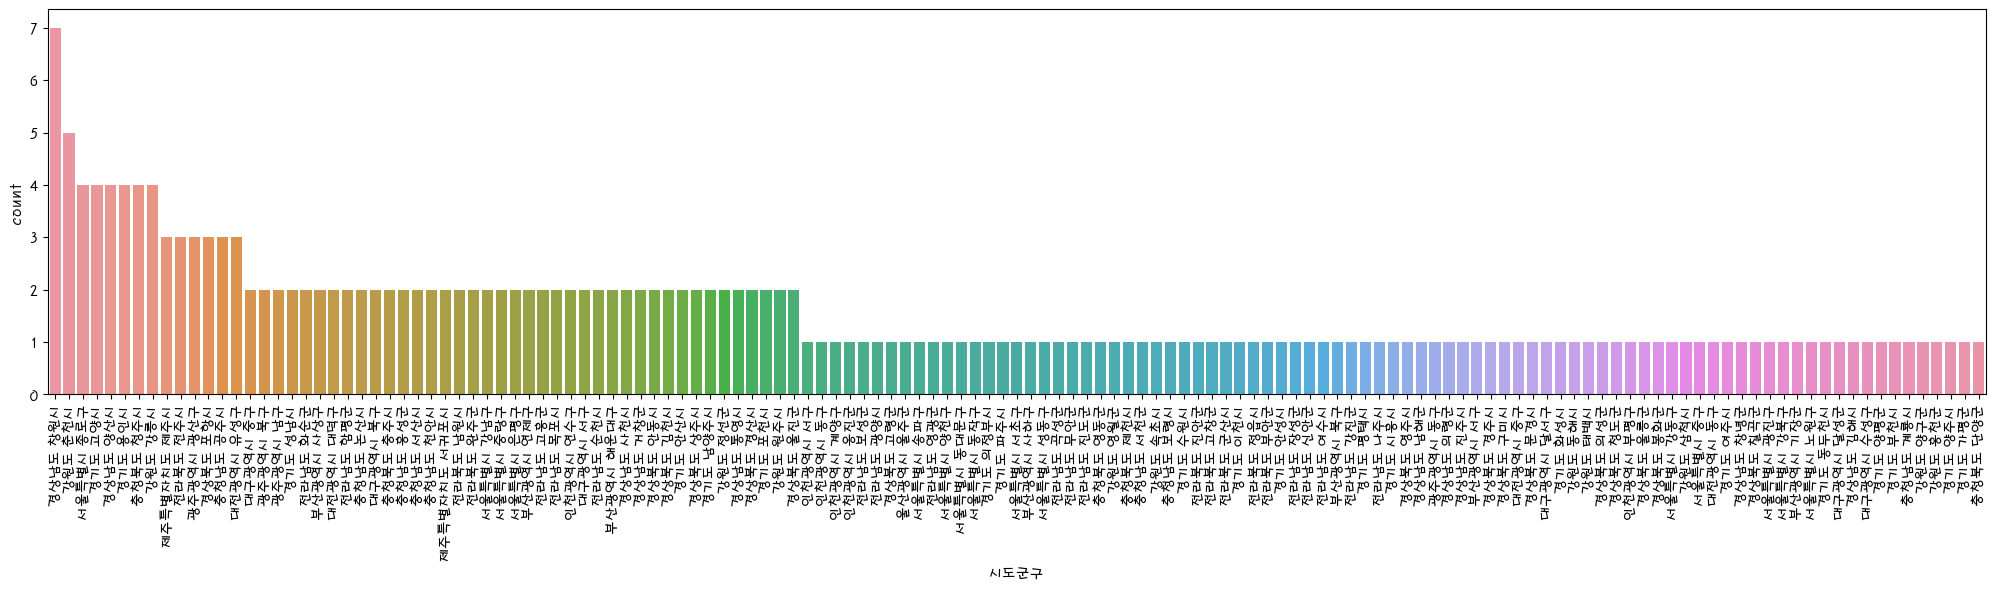

In [39]:
#행정구역별 의료기관수
plt.figure(figsize=(25,5))
# 내림차순으로 정렬하고 90도 rotation
sns.barplot(data=merged_df.sort_values(by='count',ascending=False),x='시도군구',y='count')
plt.xticks(rotation = 90)
plt.show()

In [40]:
merged_df
merged_df = merged_df.reset_index(drop=True)
# sns.catplot(data=merged_df, x='군구',y = 'count',kind='bar', col='시도'
#             , col_wrap=3, sharey=False,sharex=False)
populaionhdata = merged_df.copy()


In [41]:
populaionhdata = populaionhdata.rename(columns={"count":"의료기관"})

<AxesSubplot:xlabel='의료기관', ylabel='군구'>

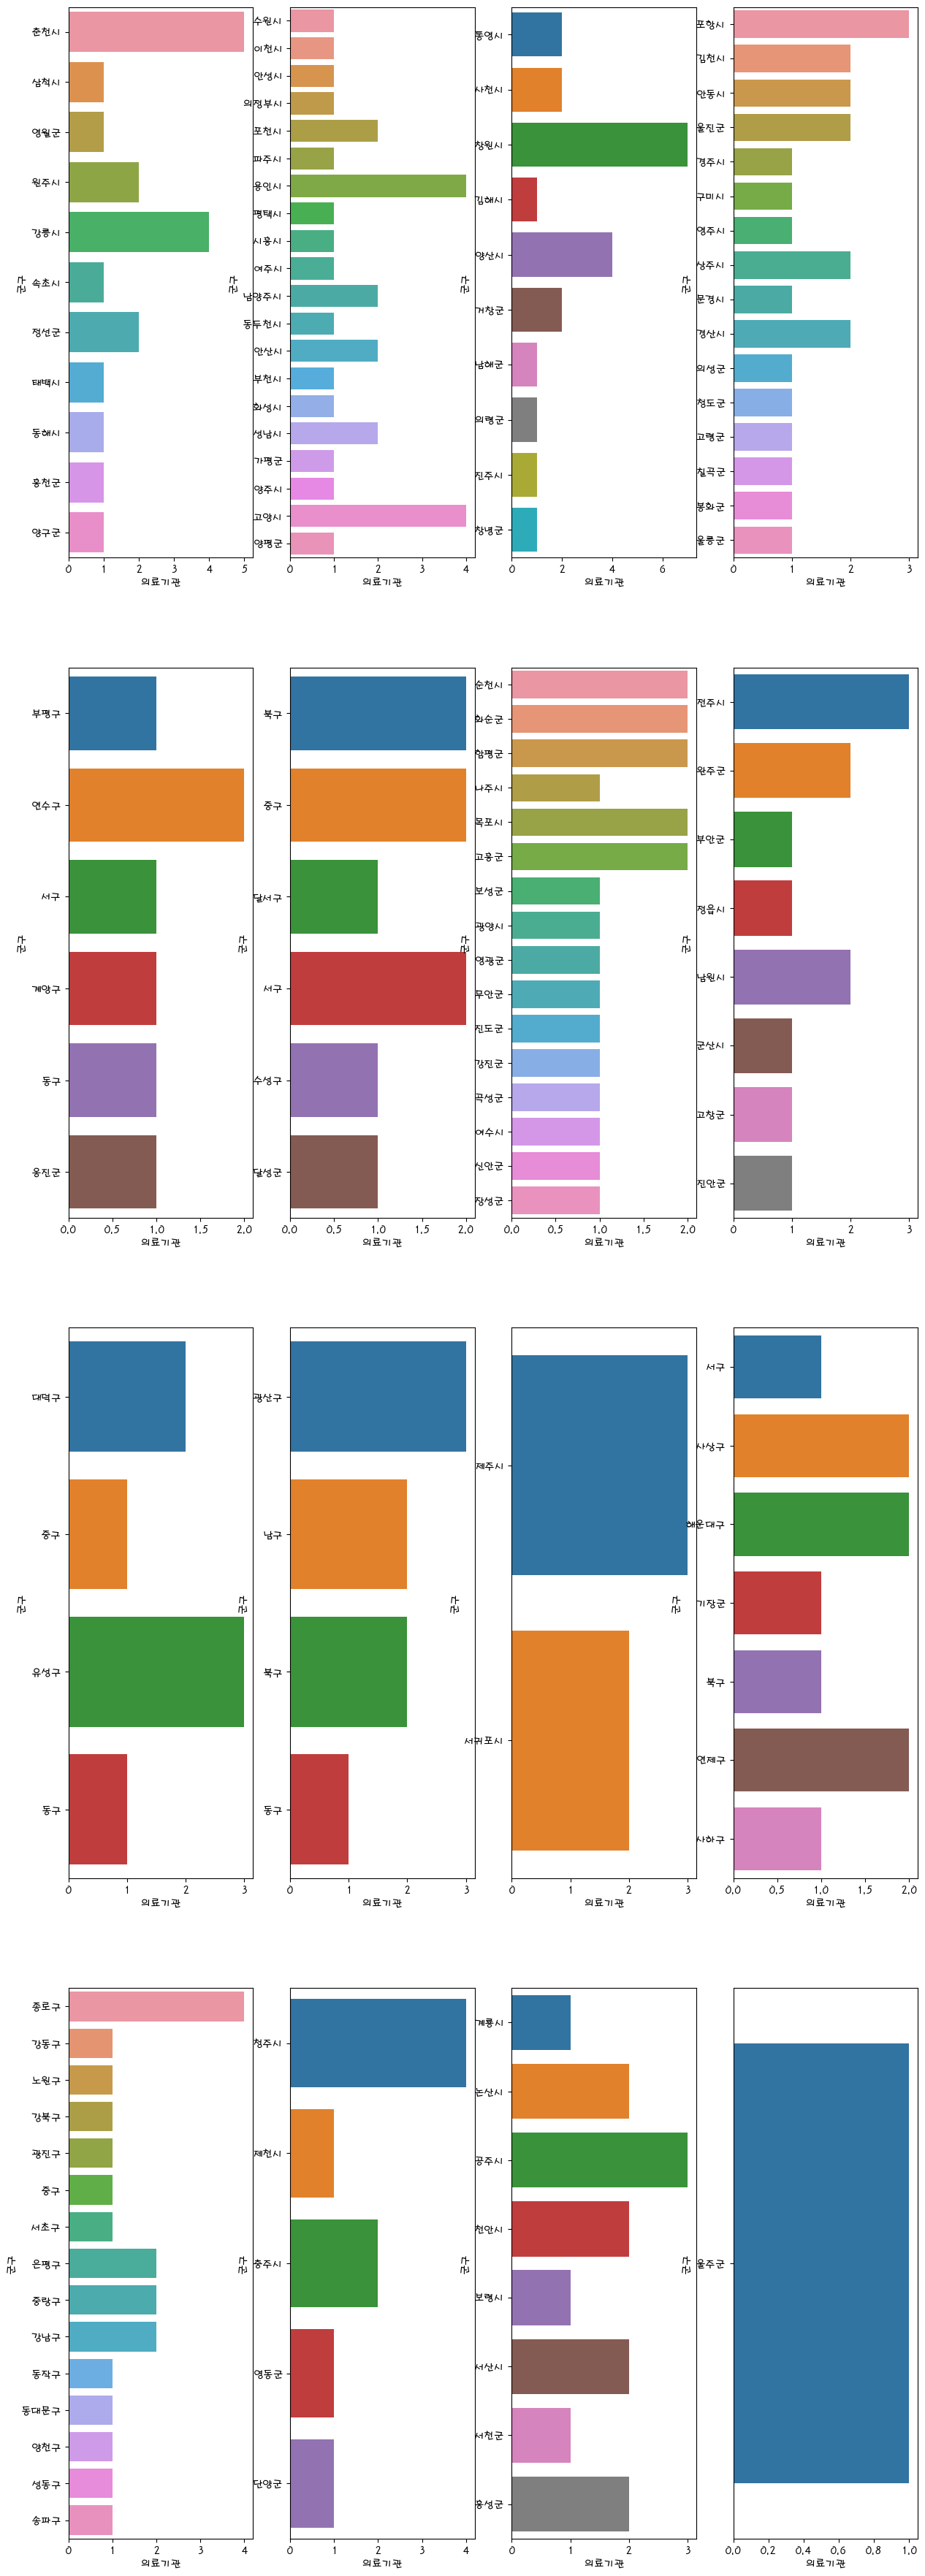

In [42]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,45))
sns.barplot(data=populaionhdata[populaionhdata['시도']=='강원도'], y='군구', x='의료기관', ax=ax[0][0])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='경기도'], y='군구', x='의료기관',ax=ax[0][1])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='경상남도'], y='군구', x='의료기관',ax=ax[0][2])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='경상북도'], y='군구', x='의료기관',ax=ax[0][3])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='인천광역시'], y='군구', x='의료기관',ax=ax[1][0])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='대구광역시'], y='군구', x='의료기관',ax=ax[1][1])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='전라남도'], y='군구', x='의료기관',ax=ax[1][2])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='전라북도'], y='군구', x='의료기관',ax=ax[1][3])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='대전광역시'], y='군구', x='의료기관',ax=ax[2][0])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='광주광역시'], y='군구', x='의료기관',ax=ax[2][1])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='제주특별자치도'], y='군구', x='의료기관',ax=ax[2][2])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='부산광역시'], y='군구', x='의료기관',ax=ax[2][3])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='서울특별시'], y='군구', x='의료기관',ax=ax[3][0])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='충청북도'], y='군구', x='의료기관',ax=ax[3][1])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='충청남도'], y='군구', x='의료기관',ax=ax[3][2])
sns.barplot(data=populaionhdata[populaionhdata['시도']=='울산광역시'], y='군구', x='의료기관',ax=ax[3][3])


In [53]:
populaionhdata.head()

,시도,군구,시도군구,의료기관,총인구수(명),남자인구수(명),여자인구수(명)
0,강원도,춘천시,강원도 춘천시,5,284594,140584,144010
1,강원도,삼척시,강원도 삼척시,1,63429,32043,31386
2,강원도,영월군,강원도 영월군,1,37904,19626,18278
3,강원도,원주시,강원도 원주시,2,357757,177396,180361
4,강원도,강릉시,강원도 강릉시,4,212965,105667,107298


In [74]:
temp = populaionhdata['시도군구'].apply(geocoding)

-------------------------------------------------------------------------------------------------------------------------------------------

In [75]:
temp.values
lat = [i.get('lat') for i in temp.values]
lng = [i.get('lng') for i in temp.values]
lng

['127.7297641',
 '129.1652969',
 '128.4619814',
 '127.9197603',
 '128.8759523',
 '128.5913424',
 '128.6608785',
 '127.0287472',
 '127.4429132',
 '127.279971',
 '127.033929',
 '127.2007295',
 '126.7801502',
 '127.1785572',
 '127.1127168',
 '126.8032255',
 '127.637033',
 '127.2165051',
 '127.0605175',
 '126.8308604',
 '126.7660139',
 '128.433205',
 '128.064562',
 '128.6818586',
 '128.8908228',
 '129.0370582',
 '127.9138505',
 '127.8925589',
 '128.2616485',
 '129.3429384',
 '128.09022',
 '128.7260798',
 '129.4006',
 '129.2248811',
 '128.3444692',
 '128.624054',
 '128.1590614',
 '128.186793',
 '128.741329',
 '128.697',
 '128.7348468',
 '128.2632',
 '128.4017',
 '128.7324',
 '130.9028503',
 '126.7220068',
 '128.5828858',
 '127.4872992',
 '127.4157',
 '128.9857176',
 '129.1146302',
 '126.8312632',
 '126.7938232',
 '126.9025',
 '126.9122',
 '127.4148',
 '128.6059471',
 '126.5130589',
 '129.0241',
 '127.1481147',
 '128.1079953',
 '127.4891742',
 '126.9827989',
 '127.1262092',
 '126.9229',
 '12

In [81]:
populaionhdata['lat'] = np.float16(lat)
populaionhdata['lng'] = np.float16(lng)

In [82]:
populaionhdata.head()

,시도,군구,시도군구,의료기관,총인구수(명),남자인구수(명),여자인구수(명),lat,lng
0,강원도,춘천시,강원도 춘천시,5,284594,140584,144010,37.87500,127.7500
1,강원도,삼척시,강원도 삼척시,1,63429,32043,31386,37.43750,129.1250
2,강원도,영월군,강원도 영월군,1,37904,19626,18278,37.18750,128.5000
3,강원도,원주시,강원도 원주시,2,357757,177396,180361,37.34375,127.9375
4,강원도,강릉시,강원도 강릉시,4,212965,105667,107298,37.75000,128.8750


In [83]:
mean_lat = populaionhdata['lat'].mean()
mean_lng = populaionhdata['lng'].mean()

In [84]:
import folium

In [85]:
# [위도,경도,강도]
p = populaionhdata.copy()
p.rename(columns={"의료기관":'cnt'},inplace=True)
p.head()

,시도,군구,시도군구,cnt,총인구수(명),남자인구수(명),여자인구수(명),lat,lng
0,강원도,춘천시,강원도 춘천시,5,284594,140584,144010,37.87500,127.7500
1,강원도,삼척시,강원도 삼척시,1,63429,32043,31386,37.43750,129.1250
2,강원도,영월군,강원도 영월군,1,37904,19626,18278,37.18750,128.5000
3,강원도,원주시,강원도 원주시,2,357757,177396,180361,37.34375,127.9375
4,강원도,강릉시,강원도 강릉시,4,212965,105667,107298,37.75000,128.8750


In [89]:
map_location =  [[p.iloc[data].lat, p.iloc[data].lng, p.iloc[data].cnt.astype(float)]   
                     for data in range(len(p))]

In [91]:
from folium.plugins import HeatMap
m = folium.Map(
    location=[mean_lat,mean_lng]
)

HeatMap(
      map_location        
).add_to(m)

In [92]:
m

C:\Users\user\miniconda3\lib\site-packages\seaborn\categorical.py:3197: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

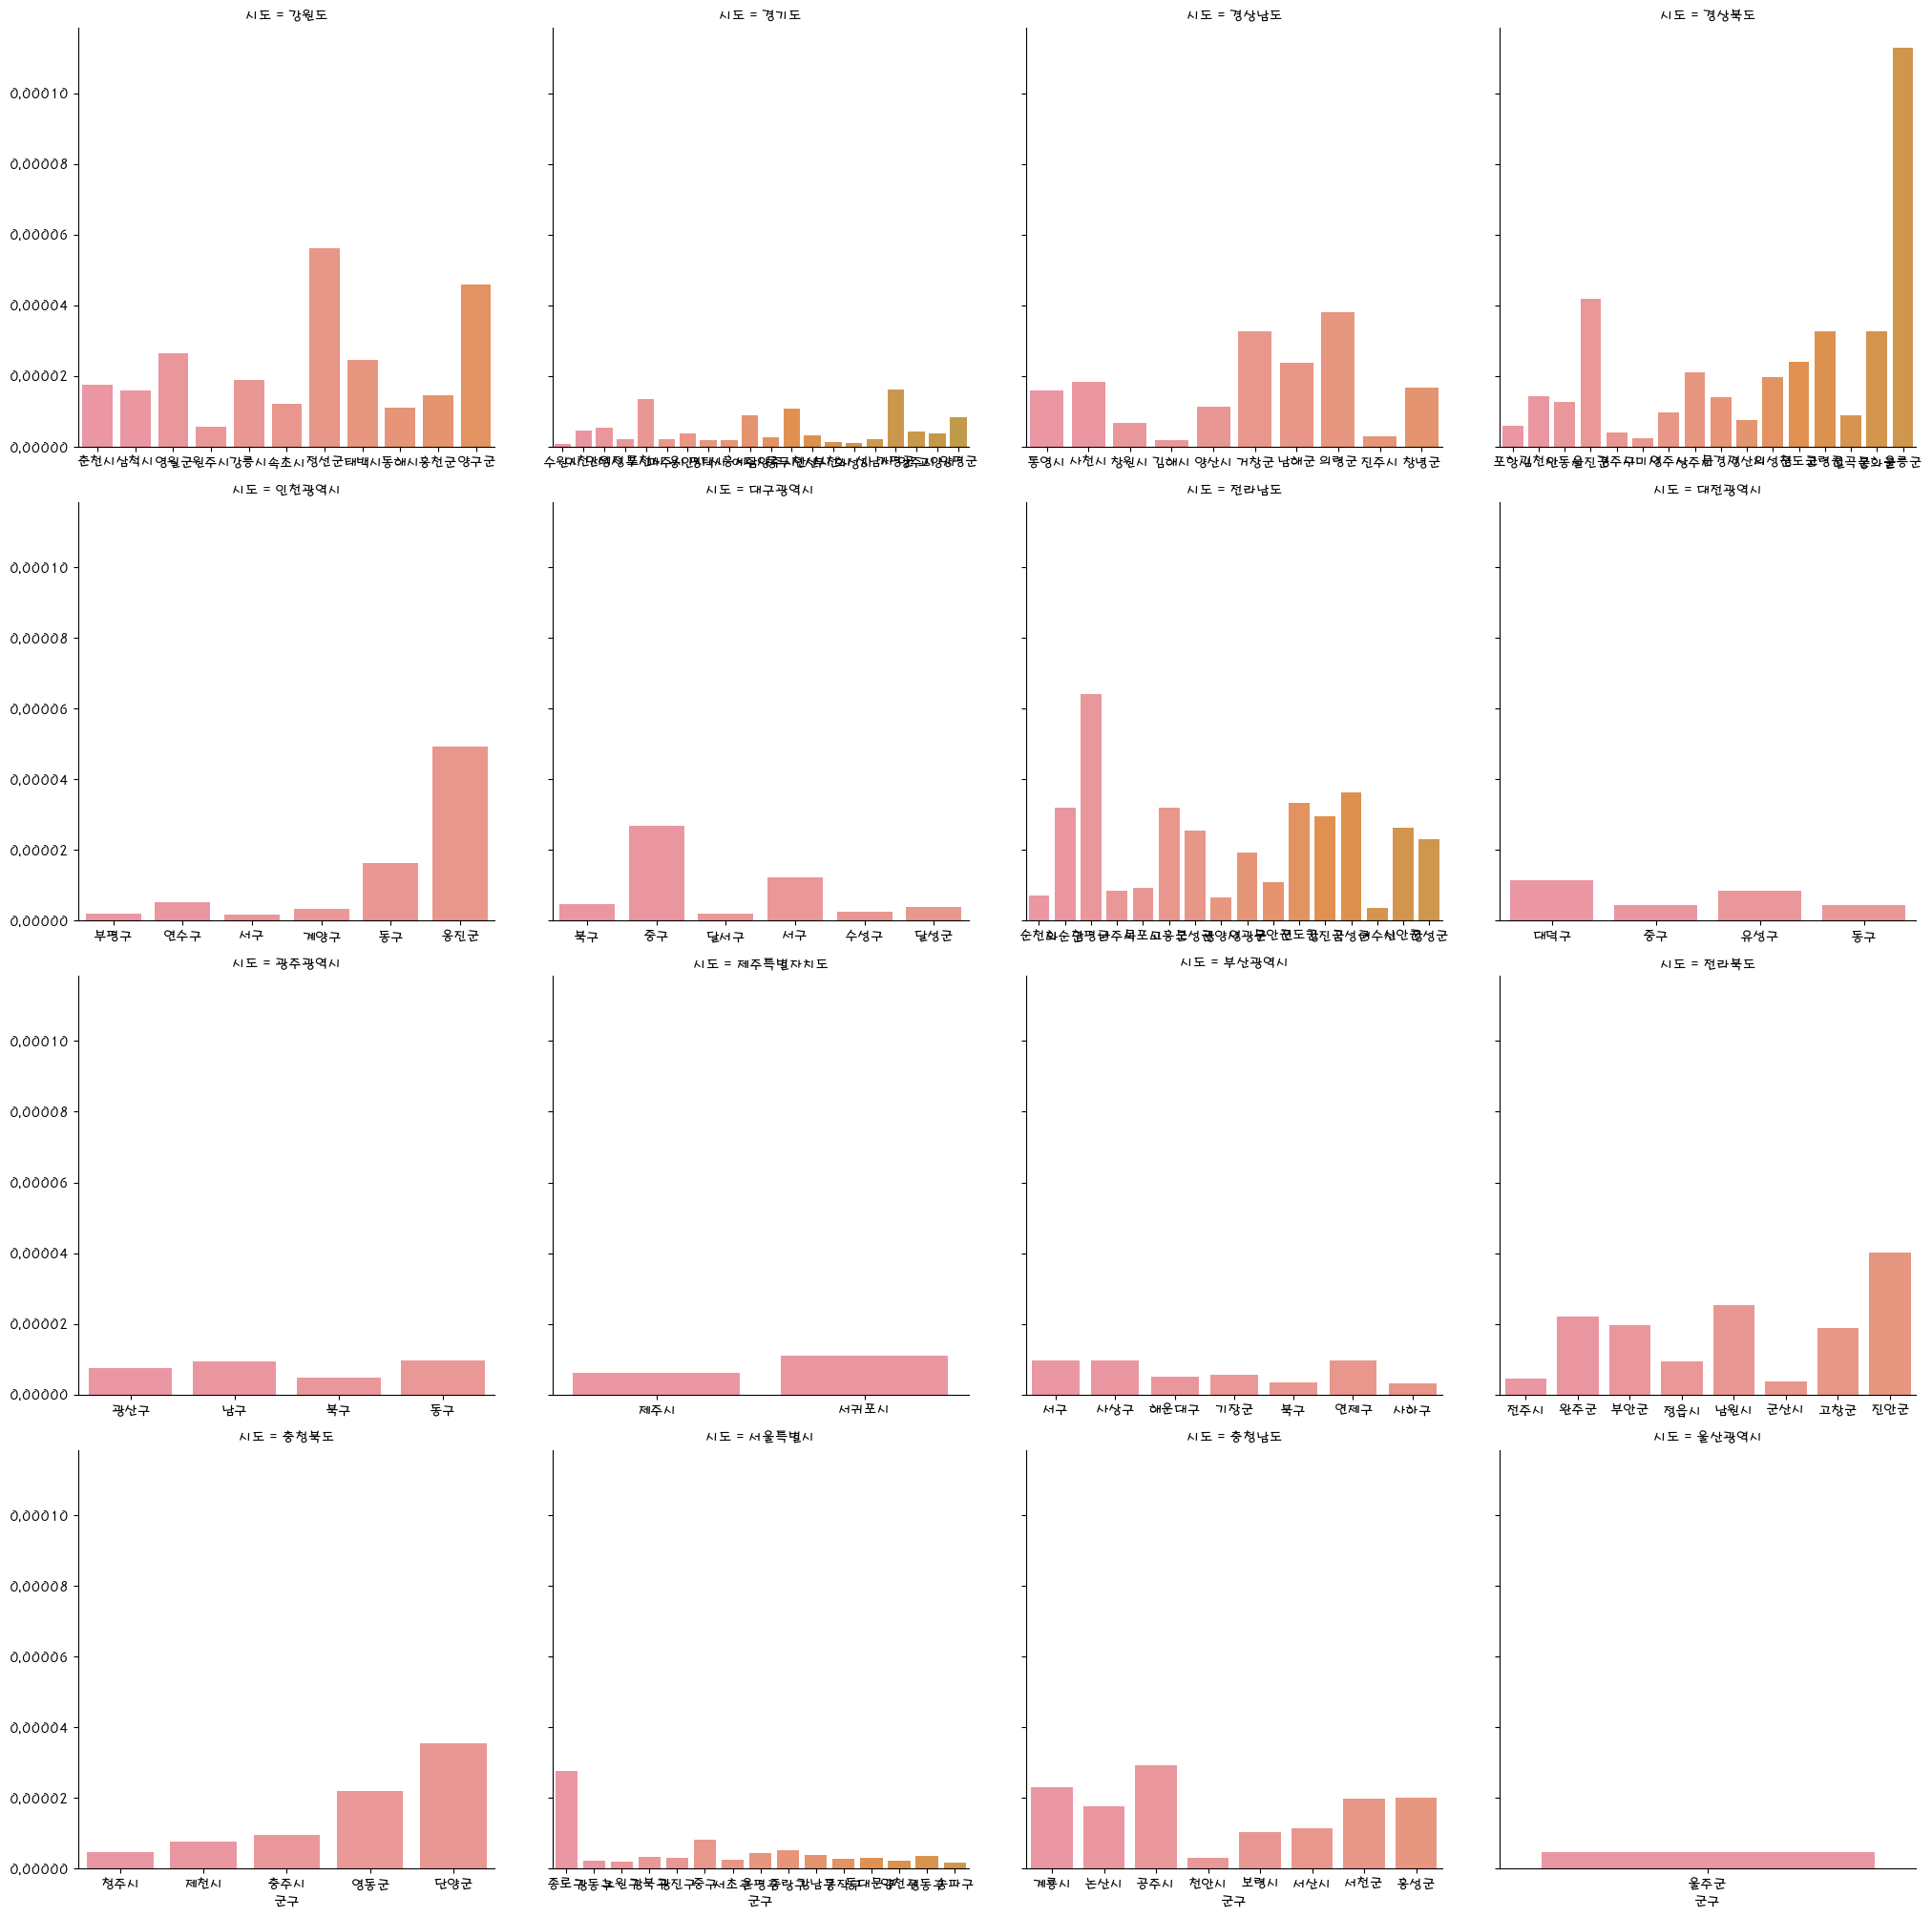

In [97]:
sns.catplot(data=p, x='군구', y=p['cnt']/p['총인구수(명)'], col='시도',kind='bar', col_wrap=4, sharex=False)

In [102]:
df = pd.read_csv('https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/used_mobile_phone.csv')

In [104]:
df.to_csv('used.csv')